# 1. Import the required libraries

In [3]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
%matplotlib notebook

# 2. Load the Chosen Dataset

First we need to load the dataset. I have chosen the first dataset, about heart-disease classification, based on 7 features, and 303 data rows.

Here we also need to start gaining knowledge of our dataset, first by quantifying the amount of data and features we have.

In [4]:
feature_names = np.loadtxt(open("heart.csv", "rb"), delimiter=",", max_rows=1, dtype = str) #The first row usually represents the column names so we can read them like this
data = np.loadtxt(open("heart.csv", "rb"), delimiter=",", skiprows=1, dtype = str) #We get the remaining rows as the data
X = data[:,:-1].astype(np.float) #We split the data to the input vectors (every column except the last one which usually represents the class) (note that all the data aren't always float so we have to cast them in a different way)
y = data[:,-1].astype(np.int) #We get the last column of the data as the target classes
print(X.shape)
print(y.shape)
colors = ['navy', 'turquoise']
target_names = [0, 1] # 0 - no heart disease, 1 - there is heart disease

(303, 13)
(303,)


# 3. Visualizations

We start with visualizing the histogram of each feature and the scatterplots of each feature pair. 

Then we test and visualize the dependence of every feature pair with some metric (Pearson's correlation coefficient is used here). 

We can also visualize the dataset into a lower dimensional set (2D, 3D) which allows a full visualization of the data using a dimensionality reduction technique such as LDA. We will also use QDA as well as Naive Bayes visualization.

### 3.1 Whole data Histograms and within class Histograms 


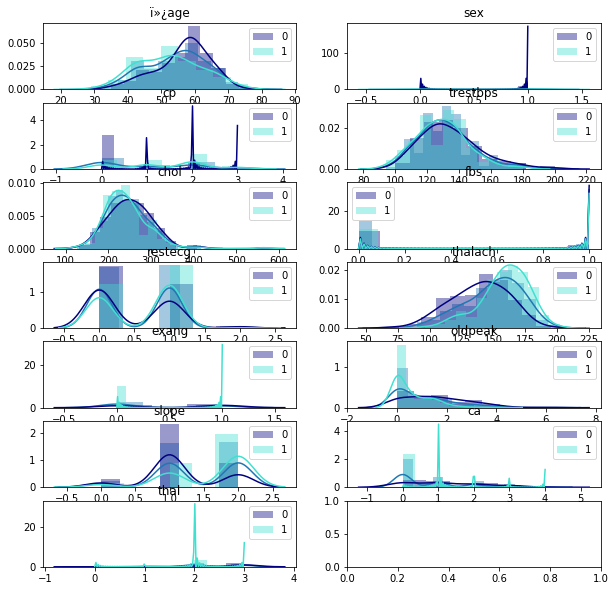

In [26]:
number_of_features = len(feature_names) - 1 #number of columns -1
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=7, ncols=2)  #7 rows
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(7,2, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X[:,feat_i]) #Once we have a specific feature, we draw the histogram of the feature's data (X[:,i] means we get the i'th column of X)
    for class_i in range(2): #we have 2 classes
        #After that we draw the within-class histograms of the same feature
        sns.distplot(X[y == class_i,feat_i], color=colors[class_i], label=target_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
    plt.legend()
plt.show()

### 3.2 Feature scatterplots. 
The scatterplot represents each data point on a 2 Dimensional space where each axis represents a feature. 
Therefore we need one scatterplot for each pair of features leading to DxD scatterplots (where D is the number of features). I only made the scatterplots for the features which give higher information in the classification task.

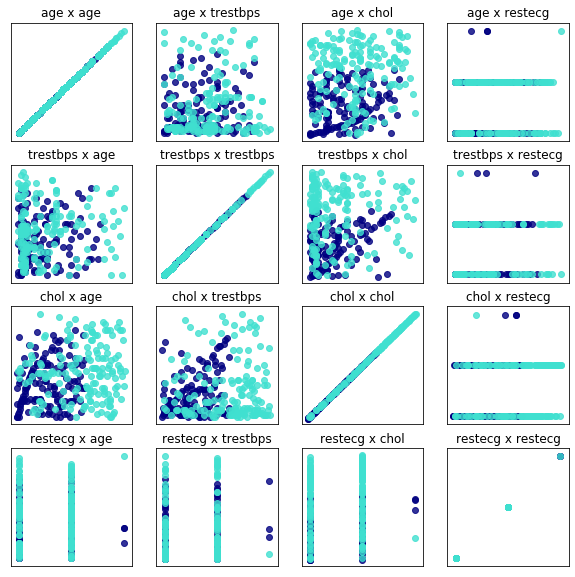

In [28]:
feature_names = ['age', 'trestbps', 'chol', 'restecg']
number_of_features = len(feature_names)
X = data[:, [0, 3, 4, 6]]

fig = plt.figure(figsize=(10, 10))
plt.title("Scatterplots of the Heart dataset features")
fig.subplots(nrows=4, ncols=4)
for feat_i in range(number_of_features): #We go over all pairs of features (4x4 in this case)
    for feat_j in range(number_of_features):  
        ax = plt.subplot(4,4,number_of_features*feat_i + feat_j+1)
        # Plot the points
        for color, i, target_name in zip(colors, [0, 1], target_names):
            plt.scatter(X[y == i, feat_i], X[y == i, feat_j], alpha=.8, color=color, label=target_name) #We again extract the feature class specific data using the same method as before and then just use the scatter function
        plt.xticks(())
        plt.yticks(())
        plt.title(feature_names[feat_i] + " x " + feature_names[feat_j])
plt.show()

### 3.3 Between feature dependence
Since we have seen through the scatterplots visually how these features are mutually dependent, we can now also calculate it using some metric. The metric we will use here is Person's correlation coefficient, however more complex metrics are available. This is visualized using the Correlation matrix.

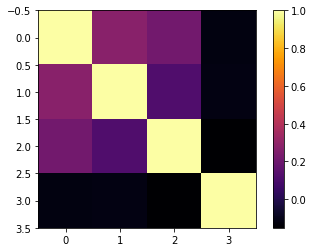

In [33]:
feature_names = ['age', 'trestbps', 'chol', 'restecg']
number_of_features = len(feature_names)
X = data[:, [0, 3, 4, 6]].astype(np.float)
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #We need a 4x4 matrix to represent the correlation matrix, where we set the value of Cij to be the correlation between the i'th and the j'th metric
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno") #We can draw the matrix using imshow
plt.colorbar()
plt.show()

# 4. Classification

### 4.1 Splitting the dataset to a training and test set
Once we have some intuition of the data we can start building the classifiers and testing the accuracy. 
First we need to split the data to a training set and a test set. Since the number of datapoints to number of feature ratio is large in this dataset, we can just use 70% of the original data as training data and the remaining 30% as test data. In other datasets where the number of data points is low, we can use techniques such as Cross Validation.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)


### 4.2 Classifications on the original dataset

#### 4.2.1 Classification using LDA 


In [39]:
#LDA model
lda = LinearDiscriminantAnalysis() #We initialize the model
lda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = lda.predict(X_test) #We get the predictions of the test data X_test using the predict function
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
#To evaluate the accuracy we need to compute the number_of_correct_predictions/number_of_total_predictions
#y_test == y_pred evaluates where the test set labels y_test are equal to the predictions y_pred and returns a vector of 1 (where they are the same) and 0 (where they are different)
#np.sum(y_test == y_pred) just computes the sum of these 1's and 0's giving the total number of correct predictions
#Afterwards we divide this sum with the number of test labels: len(y_test) to get the percentage of correct predictions
#Finally we round the accuracy to the 3rd decimal using np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the original Heart dataset", accuracy) 

LDA accuracy for the original Heart dataset 0.67


#### 4.2.2 Classification using Naive Bayes




In [40]:
#Naive Bayes model
#The initialization, fitting, predicting and evaluating accuracy is the same as the lda model
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the original Heart dataset", accuracy)

Naive Bayes accuracy for the original Heart dataset 0.615


#### 4.2.3 Classifications using QDA

In [43]:
#QDA model
qda = QuadraticDiscriminantAnalysis() #We initialize the model
qda.fit(X_train, y_train) #We fit the model to the training data X_train and the appropriate class labels y_train
y_pred = qda.predict(X_test) #We get the predictions of the test data X_test using the predict function
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
round(np.sum(y_test == y_pred)/len(y_test),3)
print("QDA accuracy for the original Heart dataset", accuracy) 

QDA accuracy for the original Heart dataset 0.626


# 5. Conclusion

As a conclusion from the obtained final classification results, we can see that the LDA has the best accuracy measure, then we have the QDA classifier and at the end we have the Naive Bayes.

Naive Bayes in generally assumes independency between features which is not always the case. However, it turns out to be a good classifier, but it is not as good as LDA and QDA classifiers in this case.

LDA uses the assumption of uniform variance for all classes, wich is crucial in cases of smaller datasets. This is actually the advantage of LDA over QDA in our case. QDA would perform better if we had larger dataset for example, where the variance of the classifier itself is not a major concern.